### Data engineering
### Author: Edgar Acuna  
### Created: August 20,2024
### Dataset:ArticullaryWordRecognitions

In [1]:
# cnn lstm model
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
 

In [2]:
import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing

def load_data(dataset, split="Train"):
    if split=="Train":
        X, y = load_classification(dataset, split="Train")
    else:
        X, y = load_classification(dataset, split="Test")
    print(" Shape of X = ", X.shape)
    print(" Shape of y = ", y.shape)
    #Swap dimensions so features are the third dimension
    X = X.swapaxes(1, 2)
    print(" New shape of X = ", X.shape)
    #prepare y
    y = pd.DataFrame(y)
    enc = preprocessing.OneHotEncoder(dtype=int)
    enc.fit(y)
    y = enc.transform(y).toarray()
    print(" New shape of y = ", y.shape)
    return X, y


### Training dataset

In [3]:
# loading Training data
X, y = load_data("ArticularyWordRecognition",split="Train")

 Shape of X =  (275, 9, 144)
 Shape of y =  (275,)
 New shape of X =  (275, 144, 9)
 New shape of y =  (275, 25)


In [4]:
X.shape

(275, 144, 9)

In [5]:
#Mean vector by dimension
Xa=X.mean(axis=0).T
Xa=pd.DataFrame(Xa)

In [6]:
Xa.shape

(9, 144)

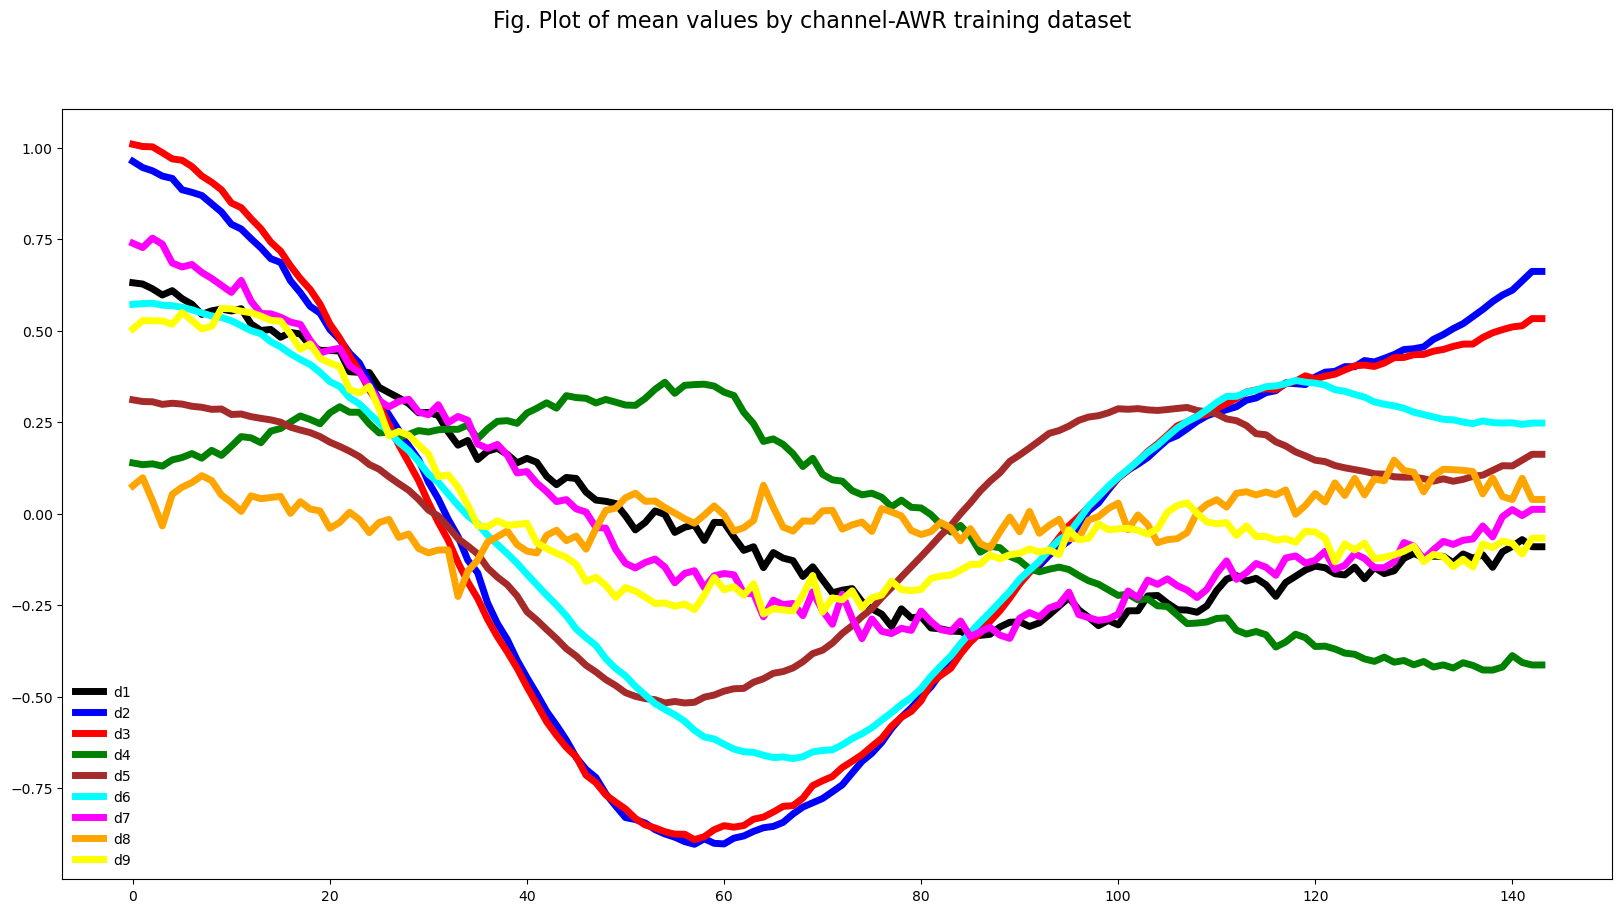

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,144,1)
fig.suptitle("Fig. Plot of mean values by channel-AWR training dataset",fontsize=16)
ax.plot(ejex, Xa.iloc[0,ejex], color='black',lw=5,  label='d1')
ax.plot(ejex,Xa.iloc[1,ejex], color='blue', lw=5, label='d2')
ax.plot(ejex, Xa.iloc[2,ejex], color='red', lw=5,  label='d3')
ax.plot(ejex,Xa.iloc[3,ejex], color='green', lw=5, label='d4')
ax.plot(ejex, Xa.iloc[4,ejex], color='brown', lw=5,  label='d5')
ax.plot(ejex,Xa.iloc[5,ejex], color='cyan', lw=5, label='d6')
ax.plot(ejex, Xa.iloc[6,ejex], color='magenta',lw=5,  label='d7')
ax.plot(ejex,Xa.iloc[7,ejex], color='orange', lw=5, label='d8')
ax.plot(ejex, Xa.iloc[8,ejex], color='yellow',lw=5, label='d9')
ax.legend(loc='best', frameon=False)

In [8]:
#Number of instances per class in the training dataset
import numpy as np
np.sum(y,axis=0)

array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11])

In [9]:
import numpy as np
yo=np.argmax(y,axis=1)
yo=np.array(yo,dtype=int)
#print(yo)

(39600, 9)


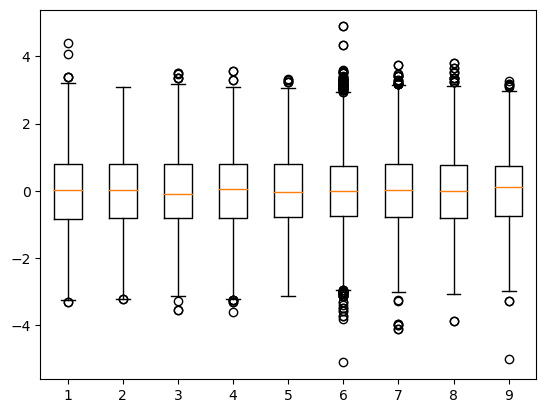

In [10]:
tempotr=X.reshape(X.shape[2],-1).T
tempodftr=pd.DataFrame(tempotr)
print(tempodftr.shape)
pyplot.boxplot(tempodftr)
pyplot.show()

array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>,
        <Axes: title={'center': '2'}, xlabel='[group]'>],
       [<Axes: title={'center': '3'}, xlabel='[group]'>,
        <Axes: title={'center': '4'}, xlabel='[group]'>,
        <Axes: title={'center': '5'}, xlabel='[group]'>],
       [<Axes: title={'center': '6'}, xlabel='[group]'>,
        <Axes: title={'center': '7'}, xlabel='[group]'>,
        <Axes: title={'center': '8'}, xlabel='[group]'>]], dtype=object)

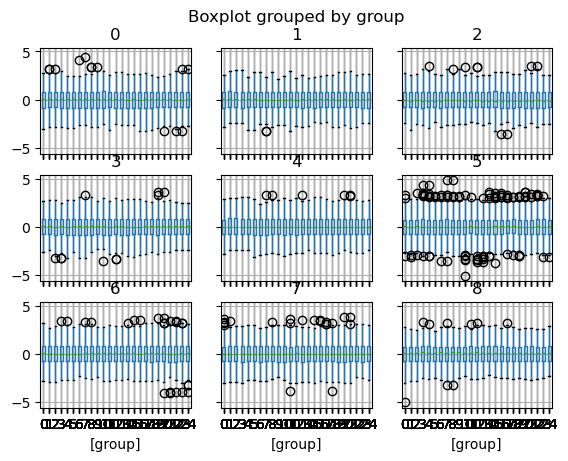

In [11]:
#Boxplots of each feature inthe groups of the training dataset
temptr=pd.DataFrame(tempotr)
from itertools import cycle
variables= cycle(yo)
print(variables)
temptr['group'] = [next(variables) for variable in range(len(temptr))]
#Bboxplot  of features by class
temptr.boxplot(by='group')

In [12]:
temptr.head()

,0,1,2,3,4,5,6,7,8,group
0,0.87159,-1.379400,-0.40691,-0.58396,-1.496000,0.646420,0.40253,0.68465,0.020586,0
1,0.74530,-0.747880,0.90243,0.71259,0.871110,0.241600,-1.58360,-0.33389,-1.924400,0
2,1.15330,-0.944730,0.71729,0.80337,-0.004698,0.001260,-0.97636,-0.91376,-1.893400,0
3,0.38622,0.276140,1.03970,-1.08940,0.797440,-0.041904,-1.51630,1.24560,0.869460,0
4,1.51560,-0.052265,1.52670,0.69072,0.152770,1.304800,-1.29700,1.80760,-2.046000,0


In [13]:
#means of dimension by group
temptr.groupby('group').mean()

,0,1,2,3,4,5,6,7,8
group,,,,,,,,,
0,-0.017669,0.009917,0.003540,0.010470,-0.022858,0.001516,0.007995,-0.005984,-0.021937
1,-0.013504,0.033399,-0.015748,0.002168,0.032638,-0.011420,-0.014980,0.010929,-0.002778
2,-0.004610,0.040128,-0.003975,-0.026707,0.030579,0.019481,-0.008527,0.012197,-0.007472
3,-0.017881,0.008519,0.001920,-0.001636,0.029452,-0.005193,-0.009068,-0.006388,0.008234
4,-0.010671,0.007738,0.010665,-0.010534,0.020608,0.004868,-0.004959,0.003302,0.018008
5,-0.006350,0.023893,0.008428,-0.001463,0.001943,-0.007980,-0.006606,0.002147,-0.000587
6,-0.004910,-0.002457,-0.024666,-0.004697,-0.016906,-0.007637,-0.002715,-0.003958,0.006302
7,0.002129,0.005695,0.022012,-0.001788,-0.016067,-0.000705,0.019313,0.001367,0.009230
8,0.001573,0.008189,0.008549,0.006529,0.012565,0.000958,0.012273,-0.005131,0.009944


In [14]:
means=temptr.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform

distances = pdist(means, metric='euclidean')
distances

array([0.0737418 , 0.08070284, 0.06429775, 0.06554301, 0.04393326,
       0.04875442, 0.0458896 , 0.05200359, 0.05584361, 0.04928343,
       0.04251801, 0.05751232, 0.06334784, 0.04079873, 0.03279188,
       0.03683099, 0.02275857, 0.04633667, 0.03498717, 0.04781175,
       0.0619494 , 0.0654532 , 0.04372891, 0.05923052, 0.04605581,
       0.0383377 , 0.05026104, 0.04295617, 0.06640424, 0.07969928,
       0.05648778, 0.0766294 , 0.07057317, 0.05694836, 0.07851712,
       0.06273495, 0.05390298, 0.07554944, 0.06939947, 0.08026199,
       0.05686761, 0.0530902 , 0.05947396, 0.04824696, 0.06840075,
       0.05711427, 0.04588375, 0.05514471, 0.0511446 , 0.05276283,
       0.07874523, 0.07925905, 0.06343242, 0.07912054, 0.07188274,
       0.05445127, 0.08529894, 0.07946991, 0.07002631, 0.08052642,
       0.0757464 , 0.08954956, 0.06236011, 0.0711186 , 0.08361836,
       0.07925449, 0.07001718, 0.06768356, 0.05684264, 0.02437144,
       0.03650913, 0.05665623, 0.0614069 , 0.03566713, 0.06698

In [15]:
distances.max()

0.0947927870399074

In [16]:
distances.min()

0.02275857429636966

In [17]:
tempoA=X.reshape(X.shape[1],-1).T
print(tempoA.shape)
#tempoA1=pd.DataFrame(tempoA)
#tempoA1.var()

(2475, 144)


### Distance between groups training

In [18]:
#Distance between the features in the two groups of the treining
means=temptr.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform

distances = pdist(means, metric='euclidean')

In [19]:
distances.max()

0.0947927870399074

In [20]:
distances.min()

0.02275857429636966

In [21]:
#media total training
meanTr=tempoA.mean(axis=0)
meanTr.shape

(144,)

In [22]:
tempoB=pd.DataFrame(tempoA)
from itertools import cycle
variables= cycle(yo)
print(variables)
tempoB['group'] = [next(variables) for variable in range(len(tempoB))]
#Bboxplot  of features by class
a=tempoB.groupby('group').mean()

In [23]:
a.shape

(25, 144)

In [24]:
ts1=a.iloc[23,:]
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.424983
p-value: 0.000000
Critical Values:
	1%: -3.478
	5%: -2.882
	10%: -2.578


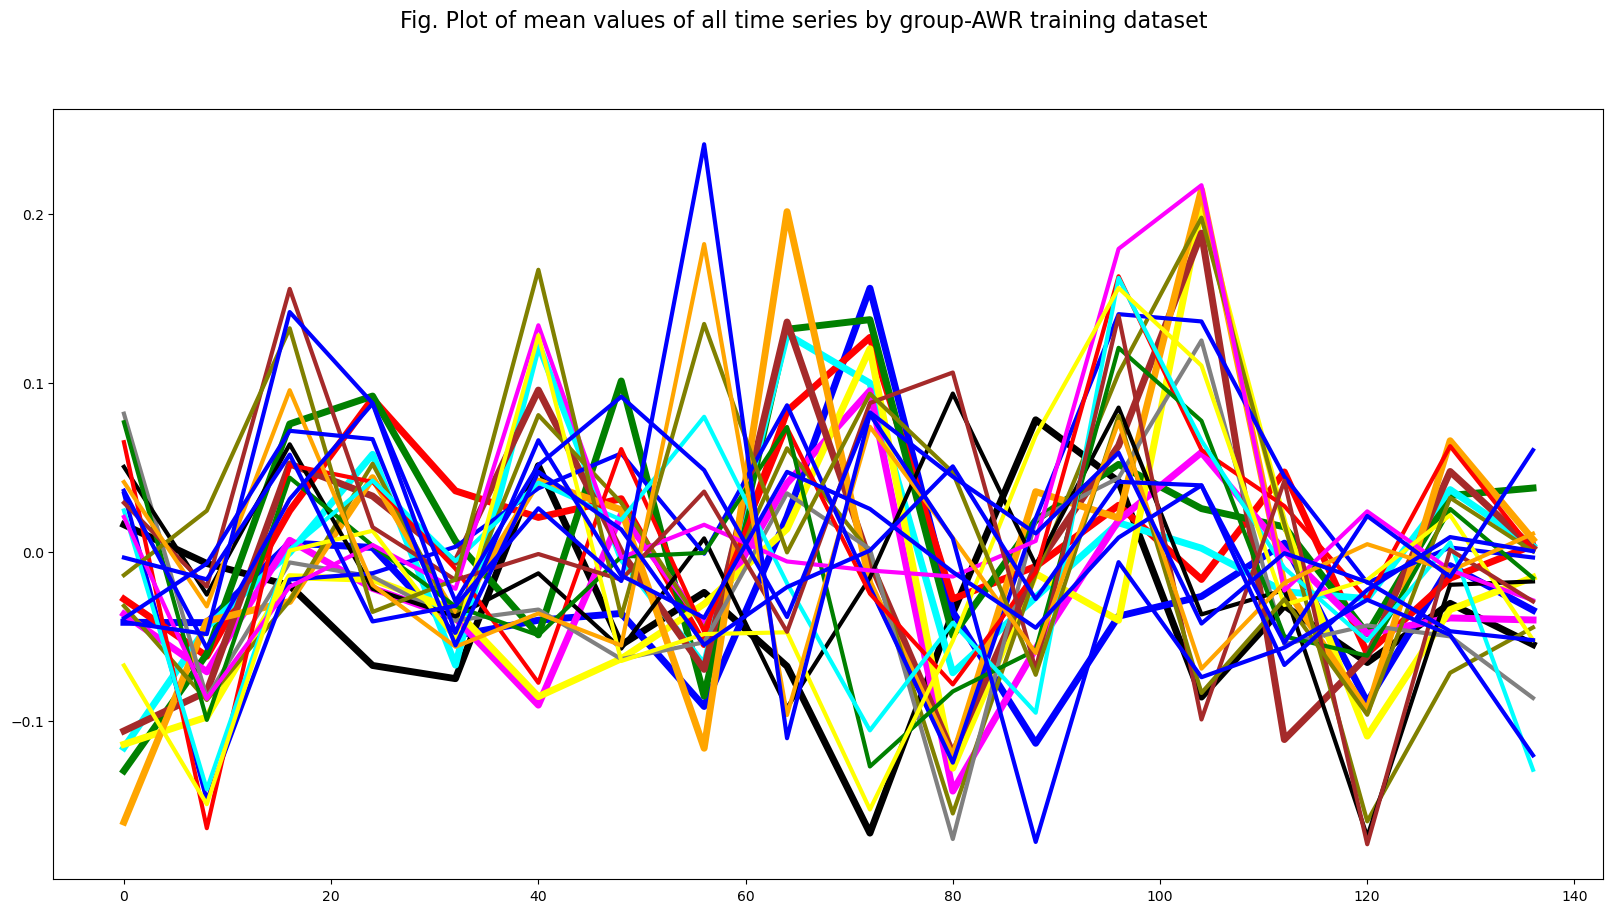

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,144,8)
fig.suptitle("Fig. Plot of mean values of all time series by group-AWR training dataset",fontsize=16)
ax.plot(ejex, a.iloc[0,ejex], color='black',lw=5, label='G1')
ax.plot(ejex, a.iloc[1,ejex], color='blue', lw=5, label='G2')
ax.plot(ejex, a.iloc[2,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, a.iloc[3,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, a.iloc[4,ejex], color='cyan', lw=5,  label='G5')
ax.plot(ejex, a.iloc[5,ejex], color='magenta', lw=5,  label='G6')
ax.plot(ejex, a.iloc[6,ejex], color='yellow', lw=5,  label='G7')
ax.plot(ejex, a.iloc[7,ejex], color='brown', lw=5,  label='G8')
ax.plot(ejex, a.iloc[8,ejex], color='orange', lw=5,  label='G9')
ax.plot(ejex, a.iloc[9,ejex], color='olive',lw=3, label='G10')
ax.plot(ejex, a.iloc[10,ejex], color='gray', lw=3, label='G11')
ax.plot(ejex, a.iloc[11,ejex], color='black', lw=3,  label='G12')
ax.plot(ejex, a.iloc[12,ejex], color='blue', lw=3, label='G13')
ax.plot(ejex, a.iloc[13,ejex], color='red', lw=3,  label='G14')
ax.plot(ejex, a.iloc[14,ejex], color='green', lw=3, label='G15')
ax.plot(ejex, a.iloc[15,ejex], color='cyan', lw=3, label='G16')
ax.plot(ejex, a.iloc[16,ejex], color='magenta', lw=3, label='G17')
ax.plot(ejex, a.iloc[17,ejex], color='yellow', lw=3,  label='G18')
ax.plot(ejex, a.iloc[18,ejex], color='brown', lw=3, label='G19')
ax.plot(ejex, a.iloc[19,ejex], color='olive', lw=3, label='G20')
ax.plot(ejex, a.iloc[20,ejex], color='orange', lw=3, label='G21')
ax.plot(ejex, a.iloc[21,ejex], color='blue', lw=3, label='G22')
ax.plot(ejex, a.iloc[22,ejex], color='blue', lw=3, label='G23')
ax.plot(ejex, a.iloc[23,ejex], color='blue', lw=3,  label='G24')
ax.plot(ejex, a.iloc[24,ejex], color='blue', lw=3,  label='G24')
#ax.legend(loc='best', frameon=False)


### Feature Selection

In [45]:
#Feature selection
from sklearn.feature_selection import  mutual_info_classif, SelectPercentile, f_classif
ym=tempoB['group']
Xm=tempoB.iloc[:,0:144]
scores1 = mutual_info_classif(Xm,ym)
scores /= scores.max()
importance1=[i for i,v in enumerate(scores1) if v > .1]
len(importance1)*100/144

0.0

In [27]:
selector = SelectPercentile(f_classif, percentile=70)
Xm_new=selector.fit_transform(Xm, ym)
scores = -np.log10(selector.pvalues_)
#scores /= scores.max()
#len(scores)
#critical value .15
importance=[i for i,v in enumerate(scores) if v > .8239]
len(importance)*100/144

0.0

In [28]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=1.115)
Xv_new=selector.fit_transform(Xm)
Xv_new.shape

(2475, 1)

In [29]:
# loading Testing data
Xt, yt = load_data("ArticularyWordRecognition",split="Test")

 Shape of X =  (300, 9, 144)
 Shape of y =  (300,)
 New shape of X =  (300, 144, 9)
 New shape of y =  (300, 25)


In [30]:
#class size in testing
import numpy as np
np.sum(yt,axis=0)

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12])

In [31]:
ar=np.sum(yt,axis=0)
np.max(ar/Xt.shape[0])

0.04

In [32]:
yto=np.argmax(yt,axis=1)
yto=np.array(yto,dtype=int)
#print(yto)

(43200, 9)


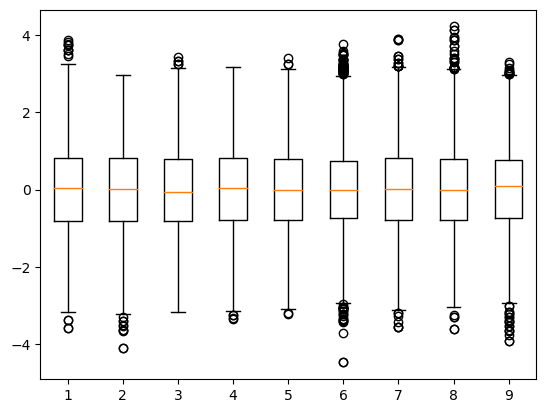

In [33]:
tempote=Xt.reshape(Xt.shape[2],-1).T
tempodfte=pd.DataFrame(tempote)
print(tempodfte.shape)
pyplot.boxplot(tempodfte)
pyplot.show()

In [34]:
tempodftr.describe()

,0,1,2,3,4,5,6,7,8
count,39600.000000,39600.000000,39600.000000,39600.000000,39600.000000,39600.000000,39600.000000,39600.000000,39600.000000
mean,-0.005783,0.008183,-0.002345,0.002304,0.000127,-0.001666,-0.000393,0.000823,-0.001251
std,0.999082,0.993824,0.997902,0.994535,0.998419,0.999048,0.993400,0.998808,0.993707
min,-3.297300,-3.217400,-3.546500,-3.604900,-3.111000,-5.099600,-4.097600,-3.865100,-4.984000
25%,-0.824020,-0.797620,-0.807238,-0.797450,-0.785055,-0.739773,-0.770730,-0.792870,-0.751597
50%,0.032300,0.027016,-0.099234,0.046863,-0.040455,0.008605,0.040764,-0.011120,0.107570
75%,0.808720,0.814628,0.812630,0.811500,0.800245,0.733060,0.806787,0.779475,0.751560
max,4.387200,3.078900,3.513600,3.550700,3.334700,4.888700,3.732500,3.817000,3.263500


array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>,
        <Axes: title={'center': '2'}, xlabel='[group]'>],
       [<Axes: title={'center': '3'}, xlabel='[group]'>,
        <Axes: title={'center': '4'}, xlabel='[group]'>,
        <Axes: title={'center': '5'}, xlabel='[group]'>],
       [<Axes: title={'center': '6'}, xlabel='[group]'>,
        <Axes: title={'center': '7'}, xlabel='[group]'>,
        <Axes: title={'center': '8'}, xlabel='[group]'>]], dtype=object)

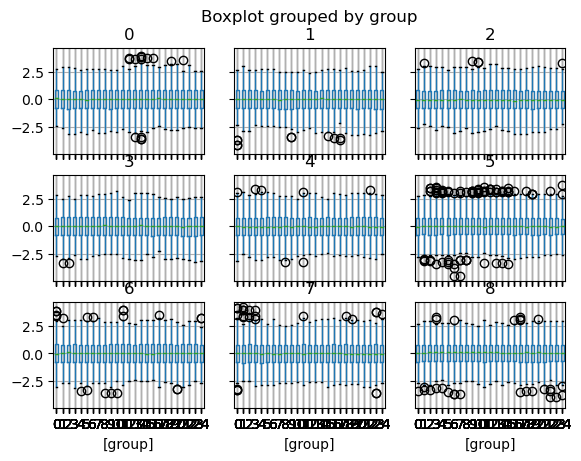

In [35]:
tempte=pd.DataFrame(tempote)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempte['group'] = [next(variables) for variable in range(len(tempte))]
#Boxplot  of features by class in testing
tempte.boxplot(by='group')

In [36]:
tempodfte.describe()

,0,1,2,3,4,5,6,7,8
count,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000
mean,-0.000507,-0.001287,0.001794,0.000242,0.003477,-0.003719,-0.001086,0.000417,0.000669
std,0.999359,0.991072,0.999143,0.997751,0.995896,0.995938,0.996532,0.997951,0.995113
min,-3.587800,-4.084000,-3.170800,-3.342000,-3.206900,-4.470900,-3.550300,-3.592700,-3.910800
25%,-0.809880,-0.813145,-0.806410,-0.800520,-0.787050,-0.734210,-0.784800,-0.789382,-0.729080
50%,0.026323,0.011929,-0.066501,0.037653,-0.024490,-0.002724,0.025293,-0.011795,0.083615
75%,0.812670,0.814130,0.785983,0.803292,0.795637,0.739422,0.801460,0.776780,0.750378
max,3.867400,2.972400,3.416200,3.162900,3.401700,3.764000,3.887000,4.213900,3.297000


In [37]:
tempoA1=Xt.reshape(Xt.shape[1],-1).T
print(tempoA1.shape)

(2700, 144)


In [38]:
tempoB1=pd.DataFrame(tempoA1)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempoB1['group'] = [next(variables) for variable in range(len(tempoB1))]
#Bboxplot  of features by class
a1=tempoB1.groupby('group').mean()

In [39]:
import numpy as np
Xb= np.concatenate((X, Xt),axis=0)
print(Xb.shape)

(575, 144, 9)


(82800, 9)


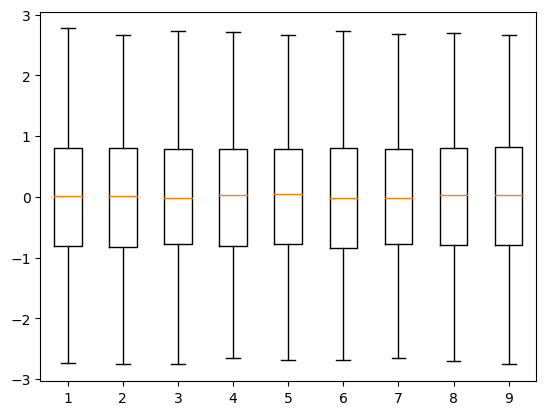

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#tempo=X.reshape(X.shape[2],-1).T
#print(tempo.shape)
X = scaler.fit_transform(X.reshape(X.shape[2], -1)).reshape(X.shape)
Xb = scaler.fit_transform(Xb.reshape(Xb.shape[2], -1)).reshape(Xb.shape)
Xt = scaler.fit_transform(Xt.reshape(Xt.shape[2], -1)).reshape(Xt.shape)
X1 = Xb.reshape(Xb.shape[2],-1).T
#print(X)
tempodf=pd.DataFrame(X1)
print(tempodf.shape)
pyplot.boxplot(tempodf)
pyplot.show()

In [41]:
#media total testung
meanTe=tempoA1.mean(axis=0)
meanTe.shape

(144,)

In [42]:
#Distance Training and Testsing
from scipy.spatial import distance
dst = distance.euclidean(meanTr, meanTe)
dst

0.6329872959300918